# Bajando datos de diferentes fuentes. Ejemplos

## Bajar datos de Bicimad

In [1]:
# Importamos librerias
import requests
import zipfile
import pandas as pd

In [2]:
url = "https://pbs.twimg.com/profile_images/616689518968762368/rkhjKqNb.jpg"
image = requests.get(url)

In [3]:
with open("mutenroy.jpg", 'wb') as f:
    f.write(image.content)

In [6]:
# https://opendata.emtmadrid.es/getattachment/037ee8a5-b824-43b1-ac7b-76225c783993/201810_Usage_Bicimad.aspx


url = 'https://opendata.emtmadrid.es/getattachment/037ee8a5-b824-43b1-ac7b-76225c783993/201810_Usage_Bicimad.aspx'

r = requests.get(url)

In [7]:
r.content[:10]

b'PK\x03\x04\x14\x00\x00\x00\x08\x00'

In [8]:
# Guardamos el zip
filename = 'bicis.zip'
with open(filename, 'wb') as f:
   f.write(r.content)

In [9]:
# Extraemos lo que hay dentro
filename = 'bicis.zip'
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(".")

In [10]:
# Leemos los datos
datos_bicis = pd.read_json('201810_Usage_Bicimad.json', lines=True, encoding='latin-1', nrows=10000)

In [11]:
# Vemos qué pinta tienen
datos_bicis.head()

,_id,user_day_code,idplug_base,track,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,{'$oid': '5bb83a812f3843232804c20e'},1744f53ab2816608dbad911cfd86d21d29e2780d8e5436...,18,"{'type': 'FeatureCollection', 'features': [{'g...",1,2,312,54,4,133,{'$date': '2018-10-01T01:00:00.000+0200'},28005
1,{'$oid': '5bb83a812f3843232804c20f'},29b46c22d367cb8444170edb870805654b4b126659dadb...,1,"{'type': 'FeatureCollection', 'features': [{'g...",1,3,280,1,0,59,{'$date': '2018-10-01T01:00:00.000+0200'},
2,{'$oid': '5bb83a812f3843232804c211'},0d80203ef0ffd087c99475a82d370e977f09f0cbda57f7...,1,NaN,1,5,276,64,0,74,{'$date': '2018-10-01T01:00:00.000+0200'},
3,{'$oid': '5bb83a812f3843232804c212'},b13348d8847744fd858ce3c14b773682f008792b19c0d6...,8,NaN,3,23,20,129,5,129,{'$date': '2018-10-01T01:00:00.000+0200'},
4,{'$oid': '5bb83a812f3843232804c213'},7414495448ddcda88650a9b26203719453467f14c60681...,23,"{'type': 'FeatureCollection', 'features': [{'g...",1,20,365,134,3,127,{'$date': '2018-10-01T01:00:00.000+0200'},28005


In [19]:
datos_bicis['track'].apply(lambda x: x.get("features", None)[0]["geometry"]["coordinates"] if type(x) == dict else x)

0           [-3.7085730999999997, 40.4037263]
1       [-3.70208899972222, 40.4241232997222]
2                                         NaN
3                                         NaN
4              [-3.6861708, 40.3992920997222]
                        ...                  
9995           [-3.7012998, 40.4265114997222]
9996                                      NaN
9997          [-3.70059499972222, 40.4572791]
9998                                      NaN
9999          [-3.70072799972222, 40.4249105]
Name: track, Length: 10000, dtype: object

# Acceso a archivos de la pagina de datos.gob.es
Uno de los mayores catálogos de información pública descargable en España

In [37]:
# url = "https://datos.gob.es/es/catalogo/ea0003337-principales-indicadores-de-sostenibilidad1.json"

# url = "https://data.renfe.com/dataset/928d911e-00ca-437b-be3f-068fc1f97800/resource/63d285e8-9f52-410b-8412-8a8c26f5ddb3/download/consumo-de-agua-y-materiales.csv"
# url = "https://estadisticas.mecd.gob.es/EducaJaxiPx/files/_px/es/csv_c/Universitaria/Financiacion_gasto/2018/ingresos/l0/Pres_Ingr_PrevDRN_CA.px"
# datos = pd.read_csv(url, )
# datos

,Unnamed: 0,Previsión Inicial,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Previsiones presupuestarias definitivas,Unnamed: 9,...,Unnamed: 160,Unnamed: 161,Derechos reconocidos netos.7,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169
0,NaN,2012,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.012000e+03,2.013000e+03,...,2017.00,2018,2012.00,2013.00,2014.00,2015.00,2016.00,2017.00,2018,NaN
1,Total Universidades Públicas,9.21253025573E9,8.739971e+09,8.594584e+09,8.733942e+09,8.939175e+09,8.892017e+09,9.288087e+09,1.213280e+10,1.143918e+10,...,6724092.36,526821.97,19240793.26,769910.63,3580534.94,2850028.84,1931248.72,22937114.07,1688980.69,NaN
2,Andalucía,1.79839326944E9,1.636452e+09,1.582915e+09,1.628552e+09,1.676944e+09,1.732860e+09,1.798159e+09,2.527445e+09,2.373018e+09,...,69742.92,46259.31,100167.49,119329.67,413193.14,720379.62,293240.03,193704.96,654810.33,NaN
3,Aragón,2.55965686E8,2.578565e+08,2.516782e+08,2.462158e+08,2.568259e+08,2.671617e+08,2.703907e+08,2.790012e+08,2.702751e+08,...,0.00,0.0,0.00,0.00,0.00,0.00,65000.00,0.00,3086.11,NaN
4,Asturias (Principado de),2.1150275E8,1.979083e+08,1.950512e+08,1.935263e+08,1.959949e+08,2.002651e+08,2.061807e+08,2.212639e+08,1.990316e+08,...,0.00,0.0,0.00,223657.11,1330.00,1050002.00,0.00,0.00,0.0,NaN
5,Balears (Illes),8.82215783E7,8.531465e+07,8.603987e+07,8.643781e+07,8.865956e+07,9.351993e+07,1.025815e+08,1.291032e+08,1.212071e+08,...,0.00,..,2414.83,0.00,0.00,0.00,0.00,0.00,..,NaN
6,Canarias,2.7957007948E8,2.630590e+08,2.627177e+08,2.669174e+08,2.686117e+08,2.794140e+08,2.868361e+08,3.320790e+08,3.201881e+08,...,1386.72,36677.51,2995.84,26489.18,423.50,3747.30,3799.24,4643.05,42235.34,NaN
7,Cantabria,1.23905707E8,9.940598e+07,9.890426e+07,9.843526e+07,1.059745e+08,1.075533e+08,1.087064e+08,1.722776e+08,1.379283e+08,...,0.00,..,0.00,0.00,0.00,0.00,0.00,0.00,..,NaN
8,Castilla - La Mancha,1.71650339E8,1.813540e+08,1.876065e+08,2.466648e+08,2.237427e+08,2.199919e+08,2.197650e+08,1.981521e+08,1.965181e+08,...,500000.00,..,52801.53,5371.90,247.93,16717.30,0.00,500000.00,..,NaN
9,Castilla y León,5.27363093E8,5.325229e+08,5.323485e+08,5.327280e+08,5.424026e+08,5.593807e+08,5.644894e+08,5.797359e+08,5.755939e+08,...,20026.69,31651.04,241920.24,44031.42,164434.27,23139.21,174848.10,122409.54,44767.4,NaN


In [9]:
datos.shape

(7, 4)

In [11]:
datos.columns

Index(['Año', 'Consumo de agua (m3)', 'Aceites/grasas  (kg)', 'Pinturas (kg)'], dtype='object')

In [12]:
url = 'https://opendata.euskadi.eus/contenidos/estadistica/tablas_essec_2020/es_tblestad/data/2016-2019_Tablas_es-.xlsx'
datos_pvasco = pd.read_excel(url, sheet_name='P3', header=2)
datos_pvasco

,Unnamed: 0,Abs.,Abs..1,Abs..2,Abs..3,% ver,% ver.1,% ver.2,% ver.3,%
0,Centros residenciales,208.0,87.0,91.0,126.0,1.458523,0.593452,0.605496,0.805781,38.461538
1,Servicios de respiro y apoyo,122.0,92.0,92.0,122.0,0.855480,0.627558,0.612150,0.780201,32.608696
2,Centros de día asistenciales,4414.0,4464.0,4452.0,4529.0,30.951546,30.450205,29.622729,28.963356,1.729560
3,Comedores,558.0,658.0,763.0,896.0,3.912769,4.488404,5.076851,5.729999,17.431193
4,Otros centros no residenciales,138.0,155.0,179.0,174.0,0.967674,1.057299,1.191031,1.112745,-2.793296
5,TOTAL PERSONAS MAYORES,5440.0,5456.0,5577.0,5847.0,38.145993,37.216917,37.108257,37.392083,4.841313
6,Centros residenciales,19.0,14.0,8.0,9.0,0.133230,0.095498,0.053230,0.057556,12.500000
7,Servicio de respiro y apoyo,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
8,Centros de día,2150.0,2106.0,2188.0,2212.0,15.076082,14.365621,14.558520,14.145936,1.096892
9,Centros de recuperación y atención,821.0,765.0,778.0,805.0,5.756960,5.218281,5.176658,5.148046,3.470437


In [13]:
lista_hojas = ['P1','P2','P3']

for hoja in lista_hojas:
    datos_pvasco = pd.read_excel(url, sheet_name=hoja, header=2)
    datos_pvasco.to_csv('Pais_vasco_hoja_' + str(hoja) + '.csv')

<AxesSubplot: xlabel='Año', ylabel='Aceites/grasas  (kg)'>

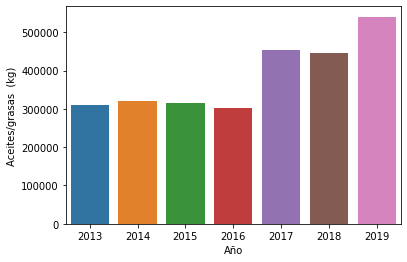

In [16]:
import seaborn as sns
sns.barplot(data = datos, x = 'Año', y = 'Aceites/grasas  (kg)')

## Bajando datos de la calidad del aire

También existe un dataset en Kaggle, pero vamos a ver un ejemplo

In [17]:
import pandas as pd
import requests
import io
import csv

url2 = "http://www.mambiente.munimadrid.es/opendata/horario.txt"

datos=pd.read_csv(url2, header=None)#.content


In [18]:
datos

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,28,79,4,1,38,2,2022,12,5,1.0,...,0,N,0,N,0,N,0,N,0,N
1,28,79,4,6,48,2,2022,12,5,0.4,...,0,N,0,N,0,N,0,N,0,N
2,28,79,4,7,8,2,2022,12,5,9.0,...,0,N,0,N,0,N,0,N,0,N
3,28,79,4,8,8,2,2022,12,5,50.0,...,0,N,0,N,0,N,0,N,0,N
4,28,79,4,12,8,2,2022,12,5,64.0,...,0,N,0,N,0,N,0,N,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,28,79,60,7,8,2,2022,12,5,3.0,...,0,N,0,N,0,N,0,N,0,N
130,28,79,60,8,8,2,2022,12,5,49.0,...,0,N,0,N,0,N,0,N,0,N
131,28,79,60,10,47,2,2022,12,5,11.0,...,0,N,0,N,0,N,0,N,0,N
132,28,79,60,12,8,2,2022,12,5,53.0,...,0,N,0,N,0,N,0,N,0,N


# APIS

In [25]:
# Llamamos a la swapi

url_swapi = "https://swapi.dev/api/starships"


response = requests.get(url_swapi) 
naves = response.json()

naves = naves['results']

In [31]:
type(naves)

list

In [30]:
for nave in naves:
    print(nave['name'])

CR90 corvette
Star Destroyer
Sentinel-class landing craft
Death Star
Millennium Falcon
Y-wing
X-wing
TIE Advanced x1
Executor
Rebel transport


In [32]:
url_swapi = "https://swapi.dev/api/starships/9/"


In [37]:
response = requests.get(url_swapi) 
naves = response.json()


In [39]:
naves

{'name': 'Death Star',
 'model': 'DS-1 Orbital Battle Station',
 'manufacturer': 'Imperial Department of Military Research, Sienar Fleet Systems',
 'cost_in_credits': '1000000000000',
 'length': '120000',
 'max_atmosphering_speed': 'n/a',
 'crew': '342,953',
 'passengers': '843,342',
 'cargo_capacity': '1000000000000',
 'consumables': '3 years',
 'hyperdrive_rating': '4.0',
 'MGLT': '10',
 'starship_class': 'Deep Space Mobile Battlestation',
 'pilots': [],
 'films': ['https://swapi.dev/api/films/1/'],
 'created': '2014-12-10T16:36:50.509000Z',
 'edited': '2014-12-20T21:26:24.783000Z',
 'url': 'https://swapi.dev/api/starships/9/'}

## OpenStreetMap

In [19]:
# Amenities
# https://wiki.openstreetmap.org/wiki/Key:amenity

import requests
import json
import pandas as pd
overpass_url = "http://overpass-api.de/api/interpreter"

overpass_query = """
[out:json];
node["amenity"="cafe"]
  (40.420801, -3.694702,40.423754, -3.688167); 
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()

<Response [200]>


In [20]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.59 e21c39fe',
 'osm3s': {'timestamp_osm_base': '2022-12-05T18:42:08Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 2977298934,
   'lat': 40.4210523,
   'lon': -3.689841,
   'tags': {'addr:city': 'Madrid',
    'addr:housenumber': '4',
    'addr:street': 'Calle de Villalar',
    'amenity': 'cafe',
    'cuisine': 'regional',
    'internet_access': 'yes',
    'name': 'Café Villalar',
    'payment:bitcoin': 'yes',
    'website': 'http://www.cafevillalar.com/'}},
  {'type': 'node',
   'id': 3426617375,
   'lat': 40.4221948,
   'lon': -3.6923421,
   'tags': {'amenity': 'cafe',
    'name': 'Gran Café Gijón',
    'phone': '+34 915 215 425',
    'website': 'https://cafegijon.com/',
    'wikidata': 'Q1025608',
    'wikipedia': 'es:Café Gijón'}},
  {'type': 'node',
   'id': 4703448419,
   'lat': 40.4229908,
   'lon': -3.6936524,
  

In [40]:
data.keys()

dict_keys(['version', 'generator', 'osm3s', 'elements'])

In [41]:
data.get('osm3s')

{'timestamp_osm_base': '2022-12-05T18:42:08Z',
 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}

In [42]:
data['osm3s']

{'timestamp_osm_base': '2022-12-05T18:42:08Z',
 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}

In [43]:
data['osm3s']['copyright']

'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'

In [44]:
data['elements'][0].get('tags').get('addr:street', 34)

'Calle de Villalar'

In [45]:
for element in data['elements']:
    print(element)

{'type': 'node', 'id': 2977298934, 'lat': 40.4210523, 'lon': -3.689841, 'tags': {'addr:city': 'Madrid', 'addr:housenumber': '4', 'addr:street': 'Calle de Villalar', 'amenity': 'cafe', 'cuisine': 'regional', 'internet_access': 'yes', 'name': 'Café Villalar', 'payment:bitcoin': 'yes', 'website': 'http://www.cafevillalar.com/'}}
{'type': 'node', 'id': 3426617375, 'lat': 40.4221948, 'lon': -3.6923421, 'tags': {'amenity': 'cafe', 'name': 'Gran Café Gijón', 'phone': '+34 915 215 425', 'website': 'https://cafegijon.com/', 'wikidata': 'Q1025608', 'wikipedia': 'es:Café Gijón'}}
{'type': 'node', 'id': 4703448419, 'lat': 40.4229908, 'lon': -3.6936524, 'tags': {'addr:city': 'Madrid', 'addr:housenumber': '6', 'addr:postcode': '28004', 'addr:street': 'Calle del Marqués de Monasterio', 'amenity': 'cafe', 'contact:facebook': 'https://www.facebook.com/hermanasae', 'contact:instagram': 'https://www.instagram.com/hermanasarce/', 'cuisine': 'cake', 'disused:amenity': 'restaurant', 'name': 'Hermanas Arce',

In [46]:
def json_to_dataframe(data_entrada):
    elements = data_entrada['elements']
    places = {'lat': [], 'lon': [], 'name': [], 'address': []}

    for i in elements:
        lalitude = i['lat']
        longitude = i['lon']
        name = i['tags'].get('name')
        street = i['tags'].get('addr:street', 'Calle x')
        number = i['tags'].get('addr:housenumber', 999)
        
        places['lat'].append(lalitude)
        places['lon'].append(longitude)
        places['name'].append(name)
        places['address'].append(str(street) + ' ' + str(number))

    df = pd.DataFrame(places)
    return df

In [47]:
lista_responses = [data1, data2, data3, data4]
for data in lista_responses:
    df_return = json_to_dataframe(data)
    df_results = df_results.concat(df_return)

NameError: name 'data1' is not defined

In [ ]:
places